<a href="https://colab.research.google.com/github/Saswata020/RFM_analysis/blob/main/RFM_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA_SET

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

In [ ]:
import pandas as pd
import zipfile
import io
import requests

# UCI dataset ZIP file URL
zip_url = "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"

# Download and extract the ZIP file
response = requests.get(zip_url)
with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_file:
    # List the files within the ZIP archive
    file_list = zip_file.namelist()
    print("Files in ZIP archive:", file_list)


Files in ZIP archive: ['online_retail_II.xlsx']


In [ ]:
import pandas as pd
import zipfile
import io
import requests

# UCI dataset ZIP file URL
zip_url = "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"

# Download and extract the ZIP file
response = requests.get(zip_url)
with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_file:
    # Assuming the ZIP file contains an Excel file named 'online_retail_II.xlsx'
    # Load the Excel file into a Pandas DataFrame
    data = pd.read_excel(zip_file.extract('online_retail_II.xlsx'))

# Display the first few rows of the dataset
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Count of Countries
data["Country"].value_counts()

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  

In [ ]:
# Check missing values
data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
#Total Price
data['TotalPrice'] = data['Price'] * data['Quantity']
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
# Total Spending of Countries
data_country = data.groupby("Country").agg({'TotalPrice': lambda x: x.sum()})

In [ ]:
# Drop Unnecessary Countries for Visualization
data_country.drop(["RSA","Unspecified","EIRE"],axis=0,inplace=True)
data_country.head()

,TotalPrice
Country,
Australia,30051.80
Austria,13023.28
Bahrain,2313.15
Belgium,22663.53
Bermuda,1253.14


In [ ]:
import plotly.express as px

# Create the Geo Heatmap
fig = px.choropleth(data_country.reset_index(),  # Reset the index to include 'Country' as a column
                    locations="Country",
                    locationmode="country names",
                    color="TotalPrice",
                    hover_data=["Country", "TotalPrice"],  # Specify columns to display on hover
                    color_continuous_scale="Viridis",
                    title="Total Spending by Country")

# Show the figure
fig.show()


#The Recency and Frequency Grid breaks your user base down into:

* Champions [R(4 – 5), F(4 – 5)]
* Loyal Customers [R(3 – 4), F(4 – 5)]
* Potential Loyalists [R(4 – 5), F(2 – 3)]
* Promising [R(3 – 4), F(0 – 1)]
* Can’t Lose Them [R(1 – 2), F(4 – 5)]
* At Risk [R(1 – 2), F(3 – 4)]
* About to Sleep [R(2 – 3), F(1-2)]
* Hibernating [R(1 – 2), F(1 – 2)]
* New Customers R [(4 – 5), F(0 – 1)]
* Need Attention R [(2 – 3), F(2 – 3)]

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
 8   TotalPrice   525461 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 36.1+ MB


In [ ]:
import datetime as dt

# Change Data Type and extract only the date:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date

# Adjust today:
today = dt.date(2023, 10, 2)
print(today)

# Bigger than zero and just UK
data = data[data['Quantity'] > 0]
data = data[data['TotalPrice'] > 0]
data = data[data["Country"] == "United Kingdom"]
data.shape


2023-10-02


(473379, 9)

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0


#Recency, Monetary and Frequency

In [ ]:
# Recency and Monetary
data_x = data.groupby('Customer ID').agg({'TotalPrice': lambda x: x.sum(),
                                        'InvoiceDate': lambda x: (today - x.max()).days})
data_x.head()


,TotalPrice,InvoiceDate
Customer ID,,
12346.0,372.86,4843
12608.0,415.79,4718
12745.0,723.85,4800
12746.0,254.55,4854
12747.0,5080.53,4683


In [ ]:
# Dataset is basis on StockCode
data_y = data.groupby(['Customer ID','Invoice']).agg({'TotalPrice': lambda x: x.sum()})
data_y.head(20)

TotalPrice
Customer ID Invoice            
12346.0     491725        45.00
            491742        22.50
            491744        22.50
            492718        22.50
            492722         1.00
            493410        22.50
            493412        22.50
            494450        22.50
            495295        22.50
            499763        27.05
            513774       142.31
12608.0     529807       415.79
12745.0     508457       456.92
            518560       266.93
12746.0     512627       254.55
12747.0     490678       380.65
            491045       303.20
            492300       348.15
            497572        89.32
            498399       170.68

In [ ]:
# Find Frequency
data_z = data_y.groupby('Customer ID').agg({'TotalPrice': lambda x: len(x)})
data_z.head()

,TotalPrice
Customer ID,
12346.0,11
12608.0,1
12745.0,2
12746.0,1
12747.0,16


In [ ]:
df=data.copy()

In [ ]:
# Define the reference date (e.g., the current date)
reference_date = pd.to_datetime('2023-10-02')

In [ ]:
# Calculate Recency
recency_df = df.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (reference_date - recency_df['InvoiceDate']).dt.days
recency_df

,Customer ID,InvoiceDate,Recency
0,12346.0,2010-06-28,4844
1,12608.0,2010-10-31,4719
2,12745.0,2010-08-10,4801
3,12746.0,2010-06-17,4855
4,12747.0,2010-12-05,4684
...,...,...,...
3964,18283.0,2010-11-22,4697
3965,18284.0,2010-10-04,4746
3966,18285.0,2010-02-17,4975
3967,18286.0,2010-08-20,4791


In [ ]:
# Calculate Monetary
monetary_df = df.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_df.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)
monetary_df

,Customer ID,Monetary
0,12346.0,372.86
1,12608.0,415.79
2,12745.0,723.85
3,12746.0,254.55
4,12747.0,5080.53
...,...,...
3964,18283.0,641.77
3965,18284.0,461.68
3966,18285.0,427.00
3967,18286.0,1296.43


In [ ]:
# Calculate Frequency
frequency_df = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
frequency_df.rename(columns={'Invoice': 'Frequency'}, inplace=True)
frequency_df

,Customer ID,Frequency
0,12346.0,11
1,12608.0,1
2,12745.0,2
3,12746.0,1
4,12747.0,16
...,...,...
3964,18283.0,6
3965,18284.0,1
3966,18285.0,1
3967,18286.0,2


In [ ]:
# Merge Recency, Monetary, and Frequency DataFrames
rmf_df = pd.merge(recency_df[['Customer ID', 'Recency']], monetary_df, on='Customer ID')
rfm_table = pd.merge(rmf_df, frequency_df, on='Customer ID')

# Display the resulting DataFrame with R, M, and F scores
rfm_table.head()


,Customer ID,Recency,Monetary,Frequency
0,12346.0,4844,372.86,11
1,12608.0,4719,415.79,1
2,12745.0,4801,723.85,2
3,12746.0,4855,254.55,1
4,12747.0,4684,5080.53,16


In [ ]:
# Define a function to calculate Frequency (F) score
def FScore(x, p, d):
    # x is the value to be scored (Frequency in this case)
    # p is the column name used to identify quantiles ('Frequency' in this case)
    # d is a dictionary containing quantile values

    # Check if x is less than or equal to the 20th percentile
    if x <= d[p][0.20]:
        return 0
    # Check if x is less than or equal to the 40th percentile
    elif x <= d[p][0.40]:
        return 1
    # Check if x is less than or equal to the 60th percentile
    elif x <= d[p][0.60]:
        return 2
    # Check if x is less than or equal to the 80th percentile
    elif x <= d[p][0.80]:
        return 3
    # If none of the above conditions are met, assign the highest score
    else:
        return 4

In [ ]:
# Calculate quantiles for Frequency and store them in a dictionary
quantiles = rfm_table.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()

<ipython-input-61-4f45cdf45a50>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Apply the FScore function to the 'Frequency' column and create a new column 'Freq_Tile'
rfm_table['Freq_Tile'] = rfm_table['Frequency'].apply(FScore, args=('Frequency', quantiles))

In [ ]:
# Sort the DataFrame by 'Recency' in ascending order
rfm_table = rfm_table.sort_values('Recency', ascending=True)

In [ ]:
# Use the pd.qcut function to create Recency Tiles and assign them to the 'Rec_Tile' column
rfm_table['Rec_Tile'] = pd.qcut(rfm_table['Recency'], 5, labels=False)


In [ ]:
# Use the pd.qcut function to create Monetary Tiles and assign them to the 'Mone_Tile' column
rfm_table['Mone_Tile'] = pd.qcut(rfm_table['Monetary'], 5, labels=False)


In [ ]:
# Add 1 to each of the Recency, Frequency, and Monetary Tiles to make them start from 1
rfm_table['Rec_Tile'] = rfm_table['Rec_Tile'] +1
rfm_table['Freq_Tile'] = rfm_table['Freq_Tile'] +1
rfm_table['Mone_Tile'] = rfm_table['Mone_Tile'] +1


In [ ]:
# Create an RFM Score by concatenating the Recency, Frequency, and Monetary Tiles as strings
rfm_table['RFM Score'] = rfm_table['Rec_Tile'].map(str) + rfm_table['Freq_Tile'].map(str) + rfm_table['Mone_Tile'].map(str)

# Display the resulting DataFrame with Recency, Frequency, Monetary, Tiles, and RFM Scores
rfm_table.head()

,Customer ID,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
1194,14479.0,4680,982.86,3,3,1,4,134
314,13240.0,4680,1074.87,5,4,1,4,144
3818,18071.0,4680,975.63,5,4,1,4,144
2043,15660.0,4680,1212.13,7,5,1,4,154
2860,16782.0,4680,8158.51,26,5,1,5,155


In [ ]:
rfm_table['Rec_Tile'].value_counts()

1    836
5    794
2    790
4    788
3    761
Name: Rec_Tile, dtype: int64

**Rec_Tile (Recency Tile):**

Rec_Tile represents the Recency (R) score of each customer.
Customers are divided into quantile bins (tiles) based on their Recency scores.
For example, if you have 5 Recency tiles (0 to 4), customers with the most recent purchases would be in tile 0, and those with less recent purchases would be in higher tiles, up to tile 4.

**Freq_Tile (Frequency Tile):**

Freq_Tile represents the Frequency (F) score of each customer.
Customers are divided into quantile bins (tiles) based on their Frequency scores.
For example, if you have 5 Frequency tiles (0 to 4), customers who make the most frequent purchases would be in tile 4, and those who make fewer purchases would be in lower tiles.

**Mone_Tile (Monetary Tile):**

Mone_Tile represents the Monetary (M) score of each customer.
Customers are divided into quantile bins (tiles) based on their Monetary scores.
For example, if you have 5 Monetary tiles (0 to 4), customers who spend the most money would be in tile 4, and those who spend less would be in lower tiles.

#RFM Segmentation Readily Answers These Questions For Business

#Who are my best customers?

In [ ]:
rfm_table[rfm_table['RFM Score'] == '555'].sort_values('Monetary', ascending=False).head()

,Customer ID,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
961,14160.0,4925,8421.47,7,5,5,5,555
3192,17230.0,4878,6286.54,10,5,5,5,555
1350,14685.0,4891,4619.79,8,5,5,5,555
3039,17032.0,4862,3004.60,8,5,5,5,555
2542,16335.0,4866,2774.00,7,5,5,5,555


#Which customers are at the verge of churning?

In [ ]:
#Customers who's recency value is low
rfm_table[rfm_table['Rec_Tile'] <= 2 ].sort_values('Monetary', ascending=False).head()

,Customer ID,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
3841,18102.0,4680,349164.35,89,5,1,5,155
636,13694.0,4688,131443.19,94,5,1,5,155
3403,17511.0,4682,84541.17,31,5,1,5,155
1623,15061.0,4682,83284.38,86,5,1,5,155
2790,16684.0,4694,80489.21,27,5,1,5,155


#Who are the lost customers?

In [ ]:
#Customers who's recency, frequency as well as monetary values are low
rfm_table[rfm_table['RFM Score'] == '111'].sort_values('Recency',ascending=False).head()

,Customer ID,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
3877,18161.0,4694,184.41,1,1,1,1,111
3755,17989.0,4694,228.83,1,1,1,1,111
1592,15020.0,4694,203.42,1,1,1,1,111
2924,16874.0,4694,217.74,1,1,1,1,111
1377,14721.0,4694,115.77,1,1,1,1,111


#Who are the loyal customers?

In [ ]:
#Customers with high frequency value

rfm_table[rfm_table['Freq_Tile'] >= 3 ].sort_values('Monetary', ascending=False).head()


,Customer ID,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
3841,18102.0,4680,349164.35,89,5,1,5,155
636,13694.0,4688,131443.19,94,5,1,5,155
3403,17511.0,4682,84541.17,31,5,1,5,155
1623,15061.0,4682,83284.38,86,5,1,5,155
2790,16684.0,4694,80489.21,27,5,1,5,155


##Summing the RFM Score

In [ ]:
# Calculate RFM_Score
rfm_table['RFM_Sum'] = rfm_table[['Freq_Tile','Rec_Tile','Mone_Tile']].sum(axis=1)
rfm_table.head()

,Customer ID,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score,RFM_Sum
1194,14479.0,4680,982.86,3,3,1,4,134,8
314,13240.0,4680,1074.87,5,4,1,4,144,9
3818,18071.0,4680,975.63,5,4,1,4,144,9
2043,15660.0,4680,1212.13,7,5,1,4,154,10
2860,16782.0,4680,8158.51,26,5,1,5,155,11


#Making Segmentation For Customers Depends On RFM Sum Score

In [ ]:
# Define a function to assign RFM segments based on RFM scores
def rfm_level(df):
    # Check the calculated RFM_Sum for each customer and assign a segment accordingly
    if df['RFM_Sum'] >= 9:
        return 'Can\'t Lose Them'
    elif ((df['RFM_Sum'] >= 8) and (df['RFM_Sum'] < 9)):
        return 'Champions'
    elif ((df['RFM_Sum'] >= 7) and (df['RFM_Sum'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Sum'] >= 6) and (df['RFM_Sum'] < 7)):
        return 'Potential'
    elif ((df['RFM_Sum'] >= 5) and (df['RFM_Sum'] < 6)):
        return 'Promising'
    elif ((df['RFM_Sum'] >= 4) and (df['RFM_Sum'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

# Create a new variable RFM_Level by applying the rfm_level function to each row
rfm_table['RFM_Level'] = rfm_table.apply(rfm_level, axis=1)

# Print the header with the top 5 rows of the DataFrame, including the newly created RFM_Level column
rfm_table.head()


,Customer ID,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score,RFM_Sum,RFM_Level
1194,14479.0,4680,982.86,3,3,1,4,134,8,Champions
314,13240.0,4680,1074.87,5,4,1,4,144,9,Can't Lose Them
3818,18071.0,4680,975.63,5,4,1,4,144,9,Can't Lose Them
2043,15660.0,4680,1212.13,7,5,1,4,154,10,Can't Lose Them
2860,16782.0,4680,8158.51,26,5,1,5,155,11,Can't Lose Them


#The segments are defined as follows:
'**Can\'t Lose Them**' for customers with an RFM_Sum greater than or equal to 9.

'**Champions**' for customers with an RFM_Sum between 8 (inclusive) and less than 9.

'**Loyal**' for customers with an RFM_Sum between 7 (inclusive) and less than 8.

'**Potential**' for customers with an RFM_Sum between 6 (inclusive) and less than 7.

'**Promising**' for customers with an RFM_Sum between 5 (inclusive) and less than 6.

'**Needs Attention**' for customers with an RFM_Sum between 4 (inclusive) and less than 5.

'**Require Activation**' for customers with an RFM_Sum less than 4.

In [ ]:
rfm_table["RFM_Level"].value_counts()

Can't Lose Them       2028
Loyal                  655
Champions              538
Potential              371
Promising              217
Needs Attention        121
Require Activation      39
Name: RFM_Level, dtype: int64

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_level_agg = rfm_table.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Lose Them     4751.4       7.2   3296.5  2028
Champions           4817.9       2.0    561.7   538
Loyal               4838.3       1.4    351.1   655
Needs Attention     4698.3       1.1    213.0   121
Potential           4746.6       1.4    305.0   371
Promising           4715.0       1.2    244.2   217
Require Activation  4688.4       1.0    138.9    39

#RFM Segmentation Visualization

In [ ]:
!pip install squarify

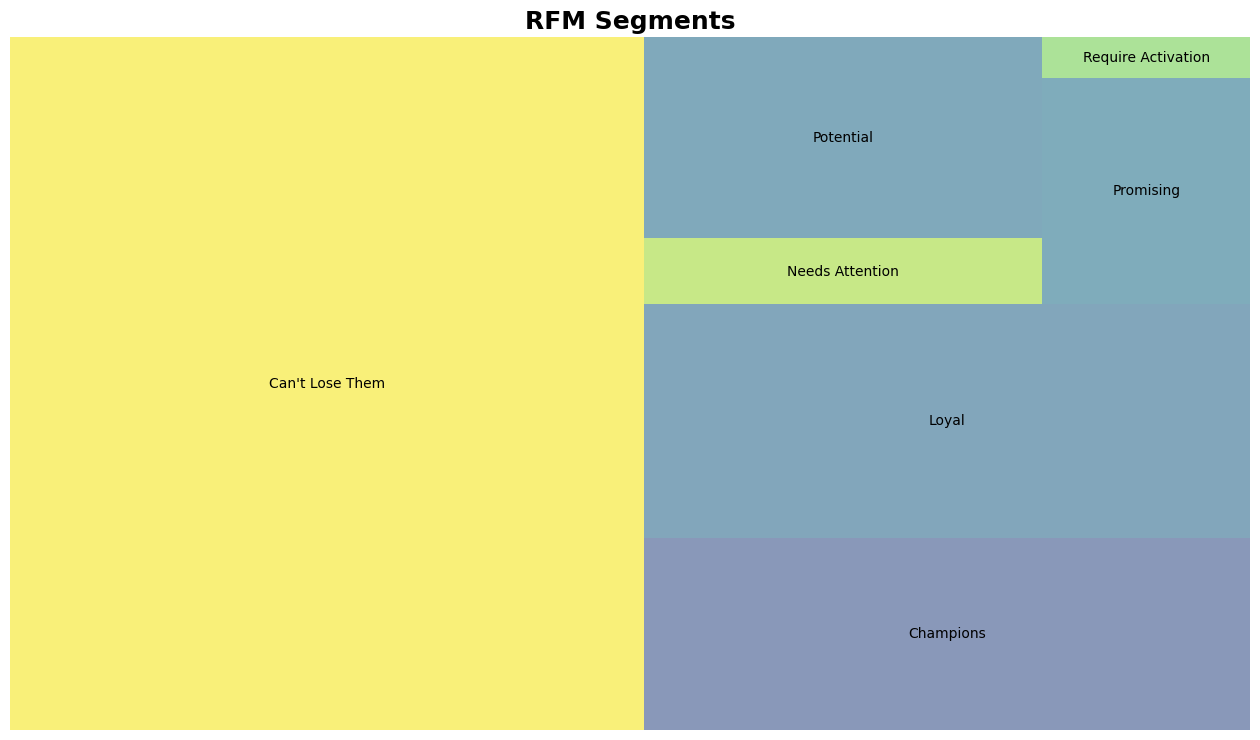

In [ ]:
import matplotlib.pyplot as plt
import squarify


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'],
              label=['Can\'t Lose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential',
                     'Promising',
                     'Require Activation'], alpha=0.6)
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()


#K-Means Segmentation

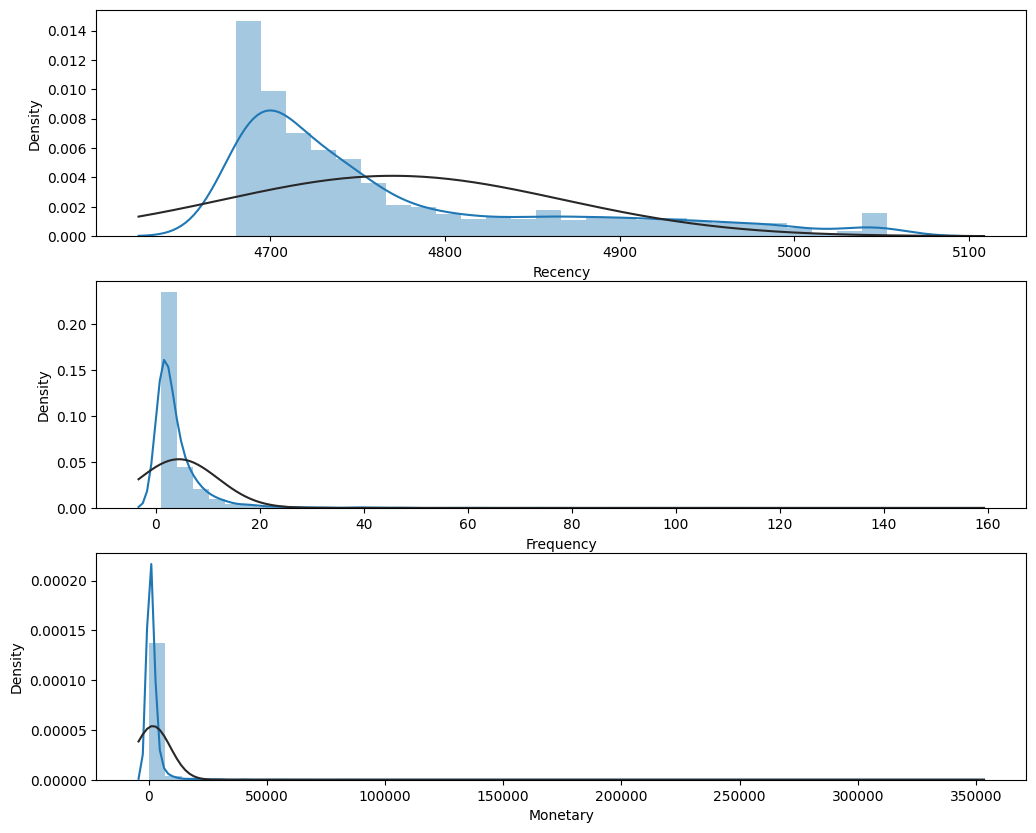

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm  # Import the norm function from scipy.stats
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


plt.figure(figsize=(12, 10))

# Plot distribution of R
plt.subplot(3, 1, 1)
sns.distplot(rfm_table['Recency'], fit=norm)

# Plot distribution of F
plt.subplot(3, 1, 2)
sns.distplot(rfm_table['Frequency'], fit=norm)

# Plot distribution of M
plt.subplot(3, 1, 3)
sns.distplot(rfm_table['Monetary'], fit=norm)

# Show the plot
plt.show()


##Normalization

In [ ]:
clustering_fm = rfm_table[['Recency',"Frequency","Monetary"]].copy()
clustering_fm.head()

,Recency,Frequency,Monetary
1194,4680,3,982.86
314,4680,5,1074.87
3818,4680,5,975.63
2043,4680,7,1212.13
2860,4680,26,8158.51


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
min_max_scaler = MinMaxScaler()

# Use the scaler to transform your data
x_scaled = min_max_scaler.fit_transform(clustering_fm)

# Convert the scaled data to a DataFrame (if needed)
data_scaled2 = pd.DataFrame(x_scaled)


In [ ]:
data_scaled2.head()

,0,1,2
0,0.0,0.012987,0.002806
1,0.0,0.025974,0.003070
2,0.0,0.025974,0.002786
3,0.0,0.038961,0.003463
4,0.0,0.162338,0.023358


##Elbow Method

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

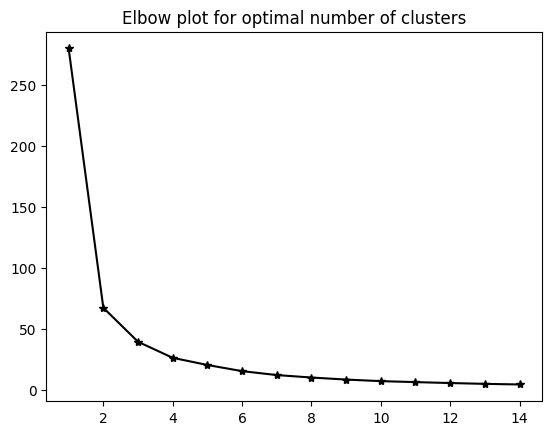

In [ ]:
from sklearn.cluster import KMeans  # Import KMeans from sklearn.cluster

wscc = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(data_scaled2)
    wscc.append(kmeans.inertia_)

# Rest of your code for plotting the elbow plot
plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

##KMeans clustering with 4 clusters

In [ ]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init =10,max_iter = 300)
kmeans.fit(data_scaled2)
pred = kmeans.predict(data_scaled2)

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score (data_scaled2, kmeans.labels_)
print("Score = ", score)

Score =  0.534429358801946


In [ ]:
y_kmeans = kmeans.predict(data_scaled2)

In [ ]:
# Count of Clusters
d_frame = pd.DataFrame(clustering_fm)
d_frame['cluster'] = y_kmeans
d_frame['cluster'].value_counts()

0    1904
3    1060
2     589
1     416
Name: cluster, dtype: int64

In [ ]:
d_frame.head()

,Recency,Frequency,Monetary,cluster
1194,4680,3,982.86,0
314,4680,5,1074.87,0
3818,4680,5,975.63,0
2043,4680,7,1212.13,0
2860,4680,26,8158.51,0


##Which Cluster Is Our Best Customers

In [ ]:
d_frame.groupby('cluster').mean()

,Recency,Frequency,Monetary
cluster,,,
0,4698.845588,6.600840,2943.311932
1,4986.901442,1.338942,421.531474
2,4869.419355,2.042445,663.578930
3,4757.800943,3.098113,1174.042416
